<a href="https://colab.research.google.com/github/Zenith1618/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Dependenices**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Data Features**

🔘 **Age** : age of the patient [years]

🔘 **Sex** : sex of the patient [M: Male, F: Female]

🔘 **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

🔘 **RestingBP** : resting blood pressure [mm Hg]

🔘 **Cholesterol** : serum cholesterol [mm/dl]

🔘 **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

🔘 **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or     depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

🔘 **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]

🔘 **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]

🔘 **Oldpeak** : oldpeak = ST [Numeric value measured in depression]

🔘 **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

🔘 **HeartDisease** : output class [1: heart disease, 0: Normal]

# **Data Collection and Processing**

In [7]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [8]:
# print first 5 rows of the dataset
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# print last 5 rows of the dataset
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [10]:
# number of rows and column in the dataset
heart_data.shape

(918, 12)

In [14]:
# features of the dataset
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
# Checking for null values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
# Statistical measures about the data
heart_data.describe().style.background_gradient(cmap='Reds')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# **EDA**

In [18]:
# check unique values of data
heart_data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

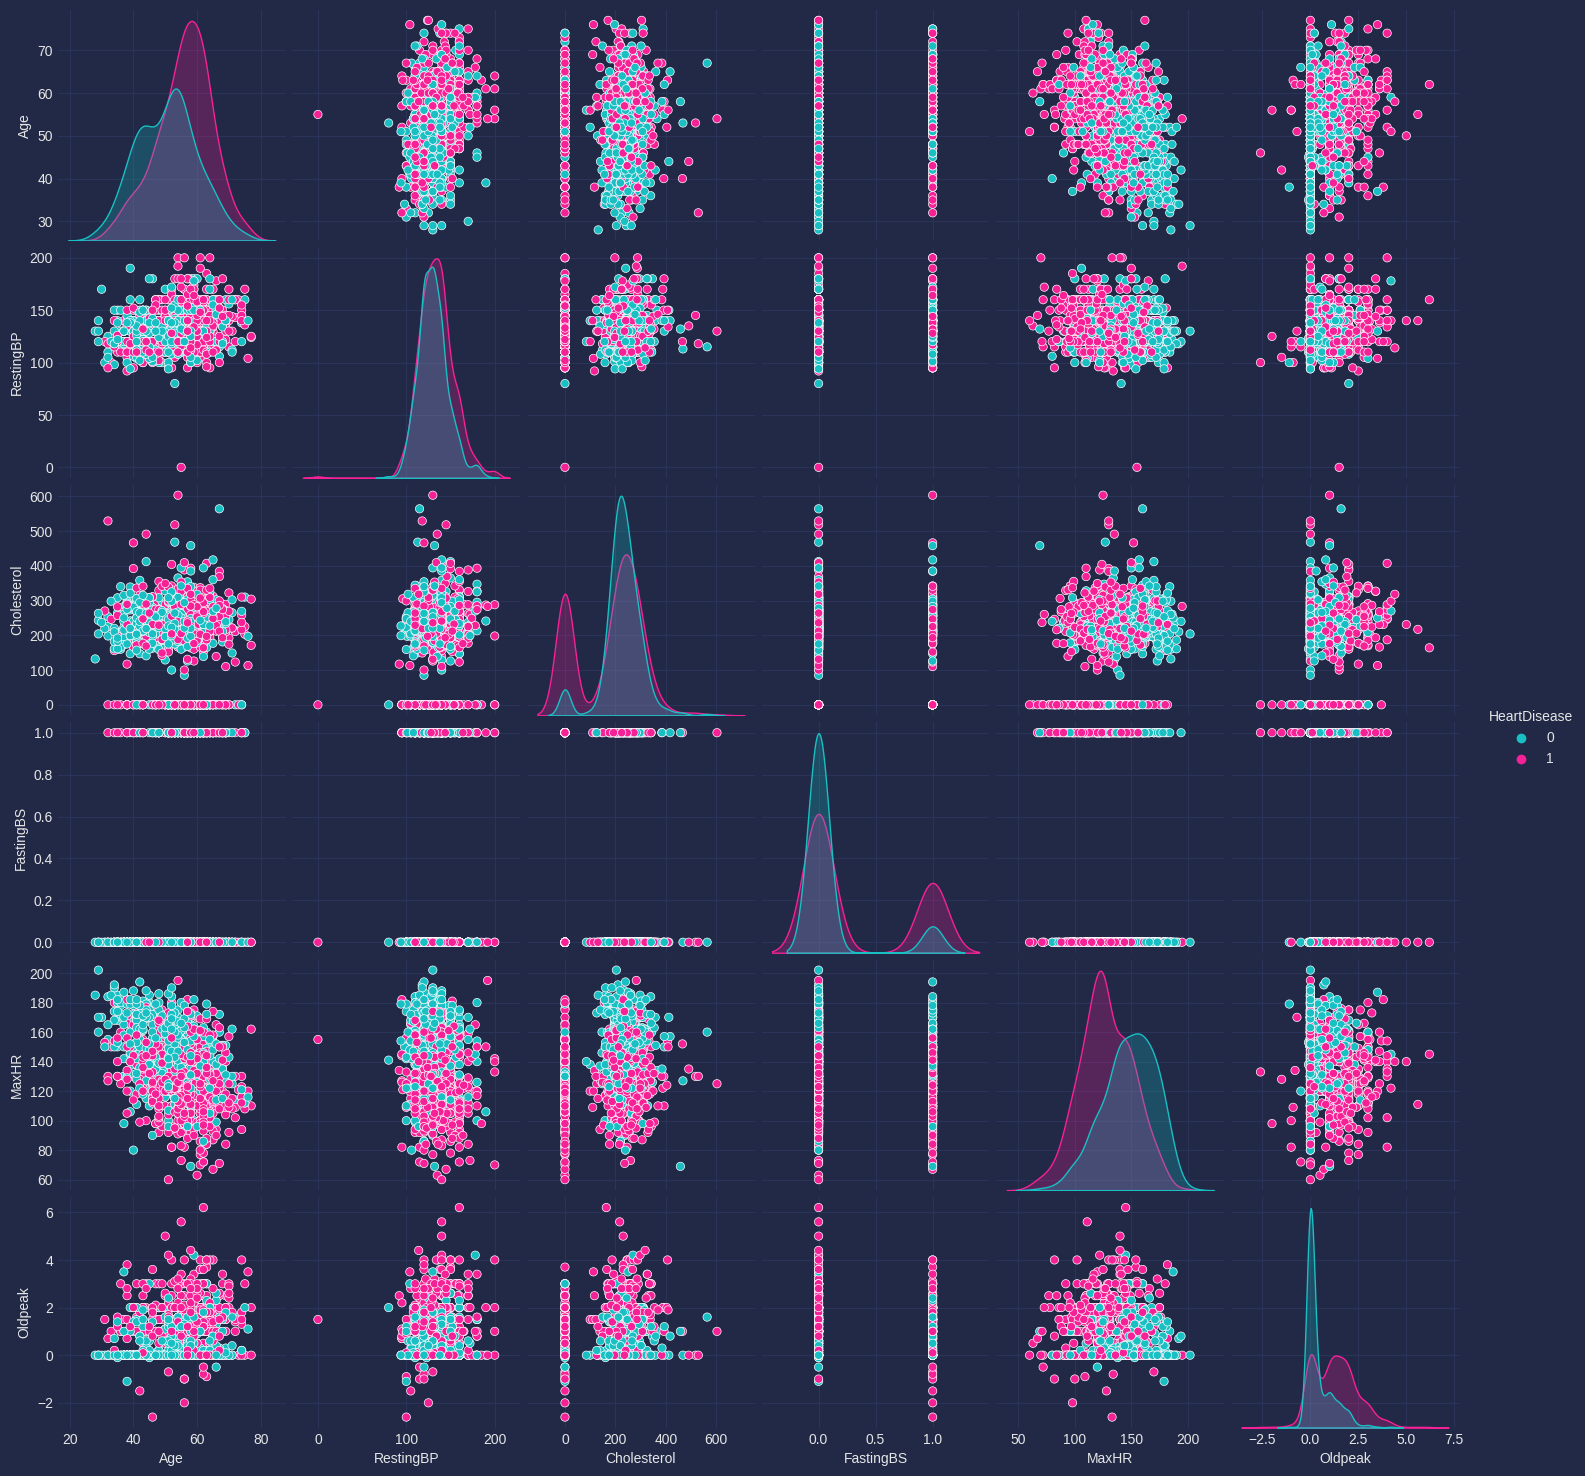

In [19]:
sns.pairplot(data=heart_data, hue='HeartDisease')

In [20]:
# Checking the distribution of the target variable
heart_data['HeartDisease'].value_counts()

#We should have even number of distribution and here its approx same 

1    508
0    410
Name: HeartDisease, dtype: int64

0 : Healthy Heart

1 : Defective Heart


Text(0.5, 1.0, 'The number of heart patients to healthy people')

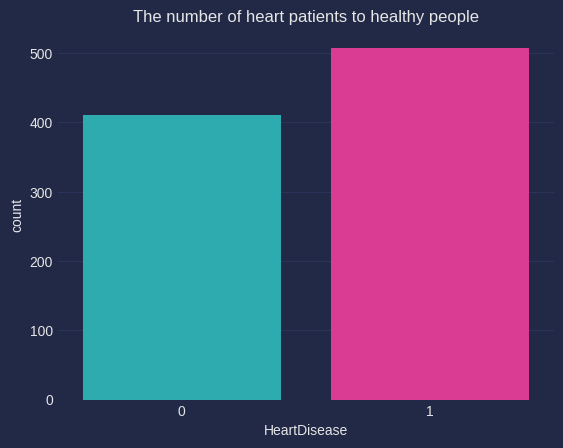

In [22]:
sns.countplot(data=heart_data, x='HeartDisease')
plt.title('The number of heart patients to healthy people')

**<p style="color:red">Observations 📋</p>**

🔘 The number of patients is more than the number of healthy people in the data

--------------------------------------------------------------------------------

🔘 **Number of sick and healthy people in both sexes?**

In [24]:
heart_data.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

In [25]:
px.histogram(heart_data,x='Sex', color='HeartDisease', template='plotly_dark', barmode='group', color_discrete_sequence=['#71AEC2 ','#D58989'], title='Distribution of sick and the healthy')

**<p>Observations 📋</p>**

🔘 Most of the patients in the data are **males**

🔘 The number of **healthy women** is more than **patients** in the data

-----------------------------------------------------------------------------------------

🔘 **The most common type of chest pain that affects the disease**

In [26]:
heart_data[heart_data['HeartDisease']==1]['ChestPainType'].value_counts()

ASY    392
NAP     72
ATA     24
TA      20
Name: ChestPainType, dtype: int64

In [36]:
fig=px.pie(heart_data,values='HeartDisease',names='ChestPainType',template='plotly_dark',color_discrete_sequence=px.colors.sequential.RdBu,title='The effect of the type of chest pain on the disease')
fig.update_traces(textposition='inside',textinfo='percent+label')

**<p style="color:red">Observations 📋</p>**
​
🔘 **Order of the type of chest pain that affects the disease the most :-**
 
   1- **ASY**
   
   2- **NAP**
   
   3- **ATA**
   
   4- **TA**
   
-----------------------------------------------------------------------------------------

🔘 **The average effect of RestingECG on both sexes in relation to the disease**

In [40]:
heart_data.pivot_table(index='Sex', columns='RestingECG', values='HeartDisease', aggfunc='mean').style.background_gradient(cmap='Reds')

RestingECG,LVH,Normal,ST
Sex,,,
F,0.297872,0.245763,0.250000
M,0.652482,0.589862,0.733333


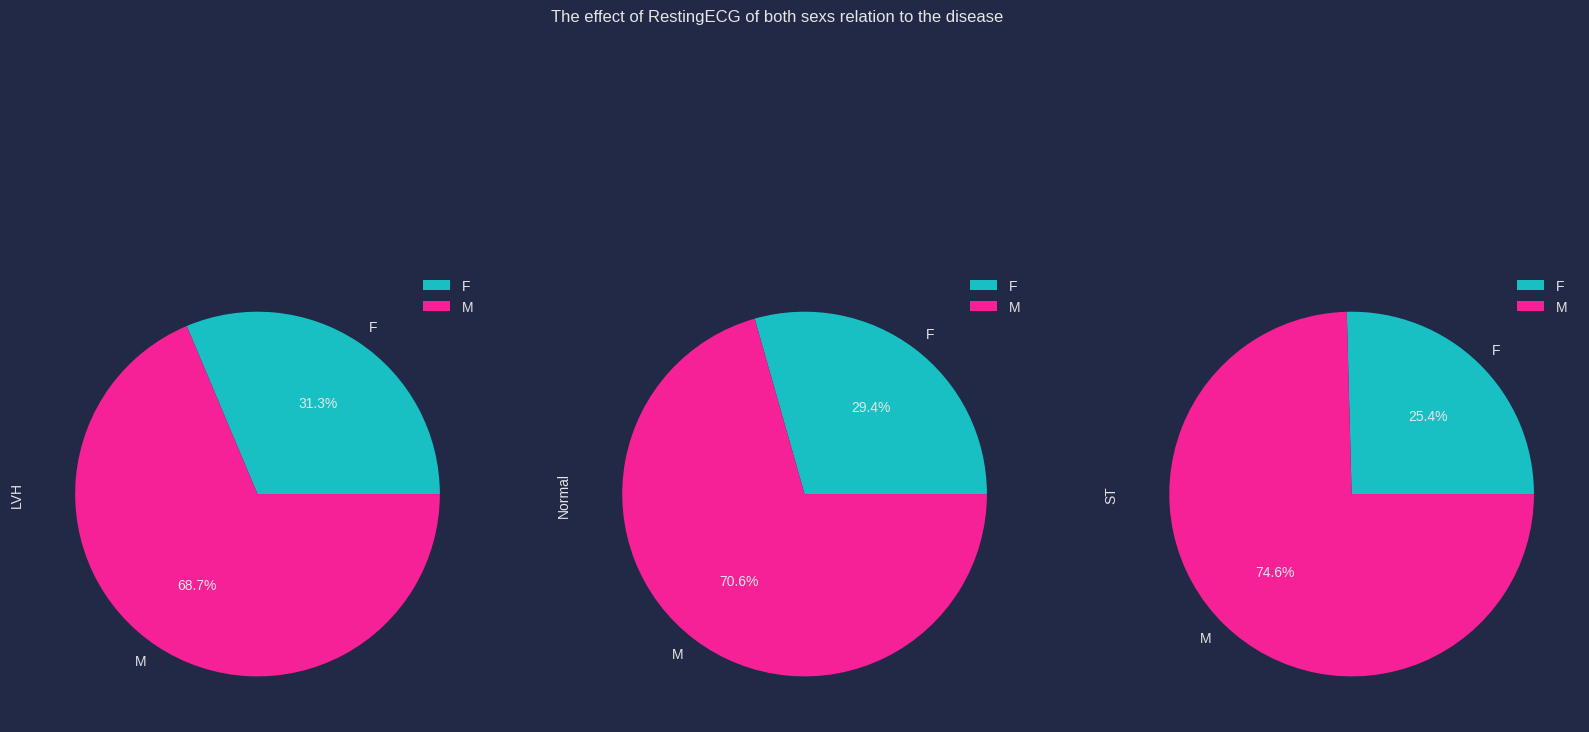

In [56]:
heart_data.pivot_table(index='Sex',columns='RestingECG',values='HeartDisease',aggfunc='mean').plot.pie(subplots=True,figsize=(20,10),title='The effect of RestingECG of both sexs relation to the disease ',autopct ='%1.1f%%')
plt.show(block=False)

**<p style="color:red">Observations 📋</p>**

🔘 **The average infection of males in the three types is more than that of females**


-----------------------------------------------------------------------------------------

🔘 **The effect of Exercise Angina on disease**

In [57]:
heart_data.groupby(['ExerciseAngina', 'HeartDisease'])['HeartDisease'].count()

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
Name: HeartDisease, dtype: int64

In [59]:
px.histogram(heart_data, x='ExerciseAngina', color='HeartDisease', template='plotly_dark', barmode='group', color_discrete_sequence=['#71AEC2', '#D58989'], title='The effect of the Exercise Angina on the disease')


**<p style="color:red">Observations 📋</p>**

🔘 **For no Exercise Angina :-**
    
   - The number of healthy people is more than the number of patients
    
🔘 **For yes Exercise Angina :-**
    
   - The number of patients is more than the number of healthy people 
   
    

--------------------------------------------------------------------------------

# Splitting the Feature and the Target

In [37]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data.target

KeyError: ignored

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into training and test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=15)

# stratify distribute the target variable 0 and 1 in an even manner, so that we have a uniform split

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


# Model Training

In [ ]:
model = LogisticRegression(max_iter=1200)

In [ ]:
# Training the Logistic Regression model with training data

model.fit(X_train, y_train)

LogisticRegression(max_iter=1200)

# Model Evaluation

Accuracy Score

In [ ]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on the training data: ', training_data_accuracy)

Accuracy on the training data:  0.8548780487804878


In [ ]:
# accuracy on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on the test data: ', test_data_accuracy)

Accuracy on the test data:  0.824390243902439


# Building a Predictive System

In [ ]:
input_data = (41,0,0,130,204,0,0,172,0,1.4,2,0,2)

# change the input data to a numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the numpy array as we are predictng for only 1 instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 0):
  print('The person doesnt have a Heart Disease\n')
else:
  print("The person has Heart Disease\n")

The person has Heart Disease



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
